# AI-POWERED RECOMMENDATION ENGINE


This is an ***AI-powered recommendation engine*** designed to enhance user experience on an e-commerce platform. The recommendation engine leverages multiple strategies to deliver personalized and relevant product suggestions:

**Content-Based Filtering:** This approach recommends products similar to those the user has shown interest in, based on product features and descriptions. It analyzes the attributes of products to provide tailored recommendations.

**Popularity-Based Recommendations:** This method suggests products based on their popularity, considering metrics like the number of ratings and average ratings. It addresses cold start problems by promoting well-regarded items to new users.

**Hybrid Approach:** Combining content-based and popularity-based methods, this strategy integrates both techniques to offer a comprehensive recommendation system. It balances personalization with broad appeal, enhancing the overall recommendation quality.

The engine’s performance is evaluated using a controlled random sampling strategy to ensure accurate and representative results.

### Evaluation Strategy

To comprehensively evaluate the performance of the recommendation system, the following approach was adopted:

#### 1. Recommendation Coverage

**Recommendation Coverage** measures the proportion of unique products that have been recommended at least once among all products in the dataset. This metric provides insight into how well the recommendation system is covering the product space. To ensure robustness in evaluation:

- **Sampling Method:** We utilized random sampling of 100 products from the dataset. This sampling helps control for randomness and provides a broad view of how the recommendation system performs across different products.
- **Process:**
  - For each sampled product, recommendations were generated using the `get_recommendations` function.
  - The unique recommended products from each sample were collected.
  - Coverage was computed as the ratio of unique recommended products to the total number of products in the dataset.

#### 2. Consistency of Results

To showcase the reliability of the recommendation system:

- **Multiple Test Cases:** The evaluation was run multiple times using different samples to assess consistency in the coverage metric.
- **Documentation of Results:**  This section visualizes the distribution of product ratings across the dataset. The histogram displays the frequency of different rating values, helping to understand the overall rating patterns and the spread of ratings among products.

#### Conclusion

The variability in the recommendation coverage metric emphasizes the need for repeated evaluations to capture a reliable performance measure. By controlling for randomness and using multiple test cases, we ensure that the evaluation provides a representative understanding of the recommendation system's performance.

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
import matplotlib.pyplot as plt
import functools

In [2]:
# Set the maximum column width to display full strings
pd.set_option('display.max_colwidth', None)

In [3]:
# Read the CSV file into a DataFrame
df = pd.read_csv('All-Appliances.csv')

In [4]:
# Display the first few rows
df.head()

,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price
0,"Pigeon by Stovekraft Amaze Plus Electric Kettle (14289) with Stainless Steel Body, 1.5 litre, used for boiling Water, maki...",appliances,All Appliances,https://m.media-amazon.com/images/W/IMAGERENDERING_521856-T1/images/I/51DGcy8eBCL._AC_UL320_.jpg,https://www.amazon.in/Pigeon-Amaze-Plus-1-5-Ltr/dp/B07WMS7TWB/ref=sr_1_1?qid=1679135585&s=appliances&sr=1-1,3.9,"128,941",₹599,"₹1,245"
1,Pigeon Polypropylene Mini Handy and Compact Chopper with 3 Blades for Effortlessly Chopping Vegetables and Fruits for Your...,appliances,All Appliances,https://m.media-amazon.com/images/W/IMAGERENDERING_521856-T1/images/I/51RXzjrUmkL._AC_UL320_.jpg,https://www.amazon.in/Pigeon-Stovekraft-Plastic-Chopper-Blades/dp/B01LWYDEQ7/ref=sr_1_2?qid=1679135585&s=appliances&sr=1-2,4.1,"274,505",₹199,₹545
2,Glun Multipurpose Portable Electronic Digital Weighing Scale Weight Machine (10 Kg - with Back Light),appliances,All Appliances,https://m.media-amazon.com/images/W/IMAGERENDERING_521856-T1/images/I/61ocesEh0cL._AC_UL320_.jpg,https://www.amazon.in/Multipurpose-Portable-Electronic-Digital-Weighing/dp/B09185QH3C/ref=sr_1_3?qid=1679135585&s=appliances&sr=1-3,3.8,365,₹199,₹899
3,beatXP Kitchen Scale Multipurpose Portable Electronic Digital Weighing Scale | Weight Machine With Back light LCD Display...,appliances,All Appliances,https://m.media-amazon.com/images/W/IMAGERENDERING_521856-T1/images/I/61Is7sICRJL._AC_UL320_.jpg,https://www.amazon.in/beatXP-Multipurpose-Portable-Electronic-Weighing/dp/B0B61DSF17/ref=sr_1_4?qid=1679135585&s=appliances&sr=1-4,3.7,"3,290",₹299,"₹1,999"
4,"Bajaj DX-6 1000W Dry Iron with Advance Soleplate and Anti-bacterial German Coating Technology, White",appliances,All Appliances,https://m.media-amazon.com/images/W/IMAGERENDERING_521856-T1/images/I/61qgKaW71mL._AC_UL320_.jpg,https://www.amazon.in/Bajaj-Majesty-1000-Watt-Iron-White/dp/B01C8P29N0/ref=sr_1_5?qid=1679135585&s=appliances&sr=1-5,4.2,"24,380",₹625,"₹1,400"


## Data Preprocessing

This section handles the data cleaning and preprocessing steps necessary to prepare the dataset for the recommendation engine. The primary tasks include checking for and handling missing values, as well as identifying and managing duplicate records.

In [5]:
# Check for duplicates
df.duplicated().sum()

0

In [6]:
# Check for for missing values in the dataset which is crucial for ensuring the quality of the data used in the recommender system.
df.isnull().sum()

name                0
main_category       0
sub_category        0
image               0
link                0
ratings           478
no_of_ratings     478
discount_price    362
actual_price       91
dtype: int64

In [7]:
# Ensure the ratings, discount_price, actual_price and no_of_ratings are numeric
df['ratings'] = pd.to_numeric(df['ratings'], errors='coerce')
df['discount_price'] = pd.to_numeric(df['ratings'], errors='coerce')
df['actual_price'] = pd.to_numeric(df['ratings'], errors='coerce')
df['no_of_ratings'] = pd.to_numeric(df['no_of_ratings'], errors='coerce')

# Fill missing values
df['ratings'].fillna(df['ratings'].mean(), inplace=True)
df['no_of_ratings'].fillna(0, inplace=True)
df['discount_price'].fillna(df['discount_price'].mean(), inplace=True)
df['actual_price'].fillna(df['actual_price'].mean(), inplace=True)

## Content-Based Recommender System

This recommender system leverages content-based filtering to provide product recommendations.
The core idea is to recommend products that are similar to a given product based on the content features.

Steps Taken:
1. **Feature Combination**: We combine multiple product features (name, main_category, sub_category, and description) into a single string. This allows the TF-IDF Vectorizer to process a comprehensive representation of each product.
2. **Text Processing**: We use the TF-IDF Vectorizer to convert the combined features into numerical vectors, capturing the importance of terms in the context of the entire dataset.
3. **Similarity Calculation**: We compute cosine similarity between these vectors to quantify how similar products are to each other.
4. **Recommendation Generation**: Given a product, we find the most similar products based on the cosine similarity scores and return the top recommendations.

The content-based approach ensures that recommendations are based on the product's features, making it suitable for users who have a specific product in mind and want similar items.

In [8]:
# Combine features into a single string (convert to string to avoid type errors)
df['combined_features'] = df['name'].astype(str) + ' ' + df['main_category'].astype(str) + ' ' + df['sub_category'].astype(str)

In [9]:
# Initialize the TF-IDF Vectorizer
tfidf = TfidfVectorizer(stop_words='english')

# Fit and transform the data
tfidf_matrix = tfidf.fit_transform(df['combined_features'])

In [10]:
# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [11]:
# Content-Based Recommendation function with caching

# Caching is implemented for the recommendation system to improve performance and efficiency.
# It is particularly useful for storing frequently accessed recommendations to avoid redundant computations.
# The implementation uses Python's built-in `functools.lru_cache` to store the results of the `get_recommendations` function.
# The maxsize parameter defines the maximum number of items to cache. 
# This will help in quickly returning the recommendations for frequently accessed products without recalculating the similarity each time.

@functools.lru_cache(maxsize=100)
def get_recommendations(name, cosine_sim=cosine_sim):
    if name not in df['name'].values:
        return "Product not found in the dataset."
    
    # Get the index of the product that matches the name
    idx = df[df['name'] == name].index[0]

    # Get the pairwise similarity scores of all products with that product
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the products based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar products
    sim_scores = sim_scores[1:11]

    # Get the product indices
    product_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar products
    return df.iloc[product_indices][['name', 'link', 'ratings', 'discount_price', 'actual_price']]

## Popularity-Based Recommender System

This recommender system provides recommendations based on the popularity of products.
The approach is straightforward: recommend products that have been rated highly or have received many ratings.

Steps Taken:
1. **Sorting by Popularity**: Products are sorted based on the number of ratings they have received, in descending order. This assumes that products with more ratings are more popular or well-received.
2. **Recommendation Generation**: We select the top 'n' products based on this sorted list and return them as recommendations.

The popularity-based approach is effective for cold-start problems where user preferences are unknown. It leverages aggregate user behavior to recommend products that are generally well-regarded.

In [12]:
# Popularity-Based Recommender
def get_popular_products(n=10):
    popular_products = df.sort_values(by='no_of_ratings', ascending=False)
    return popular_products[['name', 'link', 'ratings', 'discount_price', 'actual_price']].head(n)

# Print the popular products
print(get_popular_products())

                                                                                                                              name  \
413                                                                                  Bajaj PYGMY 178mm White Personal Fan, Regular   
2034                     ELITE PRODUCTS Top Load Washing Machine Cover Suitable for Samsung {Back Panel-New Model} 6.5KG,7KG,7.5KG   
2305  SMIPLEBOL - The Best Is Here Washing Machine Magic Filter (or) Dust Lint Bag (or) Waste Collector Net Compatible for Samsung   
2779                                Havells Monza EC 15-Litre Vertical Storage Water Heater (Geyser) with Flexi Pipe, White 5 Star   
2947     Wonderchef Sumo Mixer Grinder 1000W With 3 Stainless Steel & 1 Fruit Filter Jar 5 Years Warranty On Motor, Rust And Black   
2525                                Inditradition Silicone Iron Mat Pad | High Heat Resistant Iron Insulation Pad, 27x14 cm (Blue)   
2553                                Inditradition Silicone Iro

## Hybrid Recommender System

The hybrid recommender system combines content-based filtering and popularity-based filtering to provide more comprehensive recommendations. By integrating both approaches, we aim to capture the benefits of each and improve the overall recommendation quality.

Steps Taken:
1. **Content-Based Recommendations**: We first generate recommendations based on content similarity. This takes into account the specific attributes of the products.
2. **Popularity-Based Recommendations**: We then generate recommendations based on product popularity, ensuring that well-rated and popular products are also considered.
3. **Combining Recommendations**: We merge the results from both the content-based and popularity-based systems. This could involve simply combining lists or applying a weighted approach based on the context.

The hybrid approach balances personalized recommendations with general trends, potentially providing more relevant suggestions by leveraging both individual product attributes and overall popularity trends.

In [13]:
# Hybrid Recommender: Combining Content-Based and Popularity-Based
def hybrid_recommendations(name, cosine_sim=cosine_sim, n=10):
    content_recs = get_recommendations(name)
    popular_recs = get_popular_products(n)
    
    # Combine and ensure uniqueness
    combined_recs = pd.concat([content_recs, popular_recs]).drop_duplicates().head(n)
    return combined_recs

## Testing the Recommendation System

To evaluate the recommendation system, I am randomly sampling 6 products from the dataset to test the recommendation system (Content-Based as well as Hybrid Recommendion System). This ensures a diverse set of products and helps in evaluating the system's performance across various types of products.

In [14]:
# Display a list of product names to get recommendations for
df.head(10)['name']

0    Pigeon by Stovekraft Amaze Plus Electric Kettle (14289) with Stainless Steel Body, 1.5 litre, used for boiling Water, maki...
1    Pigeon Polypropylene Mini Handy and Compact Chopper with 3 Blades for Effortlessly Chopping Vegetables and Fruits for Your...
2                            Glun Multipurpose Portable Electronic Digital Weighing Scale Weight Machine (10 Kg - with Back Light)
3     beatXP Kitchen Scale Multipurpose Portable Electronic Digital Weighing Scale | Weight Machine With Back light LCD Display...
4                             Bajaj DX-6 1000W Dry Iron with Advance Soleplate and Anti-bacterial German Coating Technology, White
5                                                                                          Bajaj Frore 1200 mm Ceiling Fan (Brown)
6           Kuber Industries Nylon Mesh Laundry Basket|Sturdy Material & Durable Handles|Netted Lightweight Laundry Bag (Assorted)
7                                                                Prestige Electric 

In [15]:
# Testing the Content-Based Recommender System
# Test Case 1
print(get_recommendations('Bajaj Frore 1200 mm Ceiling Fan (Brown)'))

                                                      name  \
3504              Bajaj Frore EE 1200 mm Brown Ceiling Fan   
3901              Bajaj Frore EE 1200 mm White Ceiling Fan   
6243        Bajaj Edge HS 1200 mm Ceiling Fan (Dark Brown)   
305                Bajaj Maxima 600 mm Ceiling Fan (Brown)   
5863  Bajaj Edge HS Deco 1200 mm Ceiling Fan (Choko Brown)   
5949  Bajaj Edge HS Deco 1200 mm Ceiling Fan (Choko Brown)   
6078                 Bajaj Edge 1200mm Ceiling Fan (Brown)   
4167  Bajaj Regal Gold 4 Blade 1200 mm Ceiling Fan (Ivory)   
4459  Bajaj Regal Gold 4 Blade 1200 mm Ceiling Fan (Ivory)   
6485        Bajaj Edge HS 1200 mm Ceiling Fan (Opal White)   

                                                                                                                                                                                link  \
3504                                                          https://www.amazon.in/Bajaj-Frore-1200-Brown-Ceiling/dp/B0BW4KJ6D1/ref=

In [16]:
# Test Case 2
print(get_recommendations('Philips GC1905 1440-Watt Steam Iron with Spray (Blue)'))

                                                                                                                               name  \
357                                                                      Philips GC1920/28 1440-Watt Non-Stick Soleplate Steam Iron   
1933                                                                              Philips GC1010 1200-Watt Comfort Steam Spray Iron   
4070                                                                   AGARO Shine 2200-Watt with Steam & Spray Iron (White & Blue)   
5146                                                                                           Philips GC1015 1200-Watt Iron (Blue)   
3746                                                                                                  MINI PORTABLE IRON STEAM IRON   
5649                                                                                     Philips GC1022 2000-Watt Steam Iron (Pink)   
6473                                                   

In [17]:
# Test Case 3
print(get_recommendations('NutriPro Juicer Mixer Grinder - Smoothie Maker - 500 Watts (3 Jar, Silver)'))

                                                                                                                               name  \
1793  Elekart Juicer Mixer Grinder - Smoothie Maker - 500 Watts with Powerful Motor, Silver Stainless-steel body, Perfect food p...   
8655                                                                           Philips HL1631 Juicer Mixer Grinder 500 Watts, White   
3939                       Cello Grind-N-Mix Elite Mixer Grinder, 500 Watts, 3 Stainless Steel Jar and 1 Juicer Jar, Blue and White   
4761  Mixer Grinder Chutney Jar (500 ml) HEAVY QUALITY Mixer Jar Mixer Juicer Jar Suitable for all Local & Branded Mixer which c...   
5921  Philocaly Enterprise Mixer Grinder Chutney Jar (500 ml) HEAVY QUALITY Mixer Jar Mixer Juicer Jar Suitable for all Local & ...   
6010  Philocaly Enterprise Mixer Grinder Chutney Jar (500 ml) HEAVY QUALITY Mixer Jar Mixer Juicer Jar Suitable for all Local & ...   
2098  Electric Juicer Portable | Mini Portable Blender 

In [18]:
# Testing the Hybird Recommendation System
# Test Case 1
print(hybrid_recommendations('Prestige Electric Kettle PKOSS - 1500watts, Steel (1.5Ltr), Black'))

                                                                                                                               name  \
9280                           Prestige IRIS Plus 750 watt mixer grinder & Electric Kettle PKOSS - 1500watts, Steel (1.5Ltr), Black   
6567                                                                              Prestige PKOSS 1.2-Litre Electric Kettle (Silver)   
6667                                                                              Prestige PKOSS 1.2-Litre Electric Kettle (Silver)   
487                                                                                            Prestige PKOSS 1.8 Litre Kettle, Red   
2485                                                                                  Prestige Electric kettle - PKCS 1.2 L, Silver   
5674                                                                                       Prestige Glass Kettle PGKL 1.2 L (Black)   
3999  GIONEE Brings 1100W 0.5ltr Double Wall Portable S

In [19]:
# Test Case 2
print(hybrid_recommendations('Glun Multipurpose Portable Electronic Digital Weighing Scale Weight Machine (10 Kg - with Back Light)'))

                                                                                                                               name  \
9199  Glenoxzone Multipurpose Portable Electronic Digital Weighing Scale Weight Machine, Kitchen Weighing Scale Digital (10 KG),...   
9317  Glenoxzone Multipurpose Portable Electronic Digital Weighing Scale Weight Machine, Kitchen Weighing Scale Digital (10 KG),...   
211                          Stewit Multipurpose Portable Electronic Digital Weighing Scale Weight Machine | Weight Machine | 10 Kg   
5421                                              Thermomate Multipurpose Portable Electronic Digital Weighing Scale Weight Machine   
3      beatXP Kitchen Scale Multipurpose Portable Electronic Digital Weighing Scale | Weight Machine With Back light LCD Display...   
1864                                                 Generic Electronic Kitchen Digital Weighing Scale, Multipurpose (White, 10 Kg)   
956   IONIX Stainless Steel Digital Electronic Kitchen 

In [20]:
# Test Case 3
print(hybrid_recommendations('Bajaj DX-6 1000W Dry Iron with Advance Soleplate and Anti-bacterial German Coating Technology, White'))

                                                                                                                        name  \
64                      Bajaj DX-7 1000W Dry Iron with Advance Soleplate and Anti-bacterial German Coating Technology, White   
19    Bajaj Majesty DX-11 1000W Dry Iron with Advance Soleplate and Anti-bacterial German Coating Technology, White and Blue   
70                       Bajaj DX-2 600W Dry Iron with Advance Soleplate and Anti-bacterial German Coating Technology, Black   
93                        Bajaj DX-2 600W Dry Iron with Advance Soleplate and Anti-Bacterial German Coating Technology, Grey   
2217    Bajaj Popular Light Weight 1000W Dry Iron with Advance Soleplate and Anti-Bacterial German Coating Technology, White   
166       Bajaj DHX-9 1000W Heavy Weight Dry Iron with Advance Soleplate and Anti-Bacterial German Coating Technology, Ivory   
1249             Bajaj Popular Plus 750W Dry Iron with Advance Soleplate and Anti-Bacterial German Coati

## Evaluate the recommendation model

This section assesses the performance of the recommendation system using various metrics.

1. **Recommendation Coverage**:
   - Measures the proportion of unique products recommended out of the total number of products.
   - Provides an indication of the breadth of recommendations generated by the system.

2. **Sampling**:
    - Randomly samples a subset of products from the dataset to evaluate the model.
    - Helps in obtaining a representative performance metric without evaluating the entire dataset.

3. **Output**:
    - Prints the coverage metric, which reflects the model's ability to generate diverse recommendations.

4. **Plot ratings distribution for insights**: 
    - Visualizes the distribution of product ratings across the dataset. 
    - The x-axis represents the rating values, while the y-axis shows the number of products that fall into each rating range.

Recommendation Coverage: 8.89%


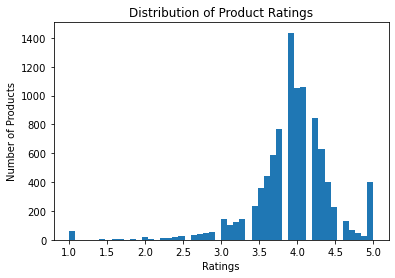

In [21]:
def evaluate_model():
    num_recommendations = 10
    unique_recommendations = set()
    total_recommendations = 0

    # Set a fixed seed for reproducibility
    np.random.seed(42)
    sample_products = df['name'].sample(100, random_state=42)

    for product_name in sample_products:
        recommendations = get_recommendations(product_name)
        
        if isinstance(recommendations, str):  # Handle product not found case
            continue
        
        recommended_products = set(recommendations['name'])
        unique_recommendations.update(recommended_products)
        total_recommendations += len(recommended_products)

    coverage = len(unique_recommendations) / len(df)

    print(f'Recommendation Coverage: {coverage * 100:.2f}%')

# Evaluate the model
evaluate_model()

# Plot ratings distribution for insights
plt.hist(df['ratings'], bins=50)
plt.xlabel('Ratings')
plt.ylabel('Number of Products')
plt.title('Distribution of Product Ratings')
plt.show()